# Algorithm Included:

**Machine Learning Algorithm:**

* Supervised:
    1. Linear Regression
    2. Logistic Regression
    3. Decision Tree(CART)
    4. Random Forest
    4. Naive Bayes
    5. SVM(Linear)
    6. KNN


* UnSupervrised
   1. K-Means
   2. Principal Component Analysis
   3. Apriori Algorithm


* Deep Learning
  1. Neural Network 
  2. CNN(Convolutional Neural Network)
  3. RNN(Recurrent Neural Network)


* Searching Algorithm
  1. BFS
  2. DFS

# Supervised

**Supervised learning is when the model is getting trained on a labelled dataset. Labelled dataset is one which have both input and output parameters. In this type of learning both training and validation datasets are labelled.**


# 1. Linear Regression

**In statistics, linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression.**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from numpy.random import randn
import random
from IPython.core.display import display,Image
from string import Template
import IPython.display
import warnings

class LinearRegression:

    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
 

    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)



X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


regressor = LinearRegression(learning_rate=0.01, n_iters=1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
    
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

y_pred_line = regressor.predict(X)




cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label="Prediction")
plt.show()

# To learn about more complex regression:

1. Regression Neural Network: https://www.kaggle.com/milan400/regression-neural-network

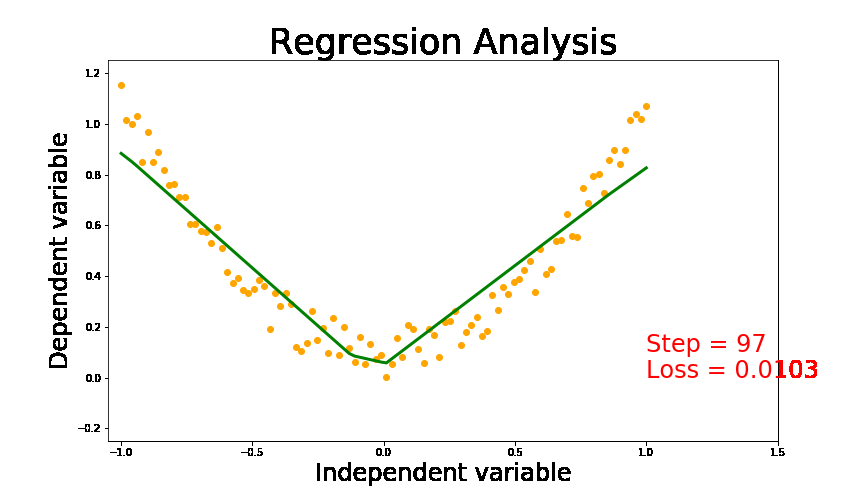

# 2. Logistic Regression

**Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression**

In [ ]:
class logisticRegression:

  def __init__(self,lr=0.001,n_iters=1000):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def fit(self,X,y):
    #init parameters
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    #gradient descent
    for _ in range(self.n_iters):
      linear_model = np.dot(X,self.weights) + self.bias
      y_predicted = self._sigmoid(linear_model)

      dw = (1/n_samples) * np.dot(X.T,(y_predicted-y))
      db = (1/n_samples) * np.sum(y_predicted-y)

      self.weights -= self.lr *dw
      self.bias -= self.lr * db 

  def predict(self,X):
    linear_model = np.dot(X,self.weights) + self.bias
    y_predicted = self._sigmoid(linear_model)
    y_predicted_cls = [1 if i>0.5 else 0 for i in y_predicted]
    return y_predicted_cls
  
  def _sigmoid(self,x):
    return(1/(1+np.exp(-x)))

#Test Logistic regression in breast_cancer
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)



def accuracy(y_true,y_pred):
  accuracy = np.sum(y_true == y_pred)/len(y_true)
  return accuracy

regressor = logisticRegression(lr=0.0001,n_iters=1000)
regressor.fit(X_train, y_train)

predictions = regressor.predict(X_test)

print("Accuracy: ",accuracy(y_test, predictions))

# 3. Decision Tree(CART)

**A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes).**

In [ ]:
from collections import Counter

def entropy(y):
  hist = np.bincount(y)
  ps = hist/len(y)
  return(-np.sum([p * np.log2(p) for p in ps if p>0]))



class Node:
  def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
    self.feature = feature
    self.threshold = threshold
    self.left = left
    self.right = right
    self.value = value
  
  def is_leaf_node(self):
    return(self.value is not None)


class DecisionTree:
  def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
    self.min_samples_split = min_samples_split
    self.max_depth = max_depth
    self.n_feats = n_feats
    self.root = None

  def fit(self, X, y):
    self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
    self.root = self._grow_tree(X, y)

  def _grow_tree(self, X, y, depth=0):
    n_samples, n_features = X.shape
    n_labels = len(np.unique(y))

    #stopping criteria
    if(depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
      leaf_value = self._most_common_label(y)
      return(Node(value=leaf_value))
    
    feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

    #greedy search
    best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)

    left_idxs, right_idxs = self._split(X[:,best_feat],best_thresh)

    left = self._grow_tree(X[left_idxs,:], y[left_idxs], depth+1)
    right = self._grow_tree(X[right_idxs,:], y[right_idxs], depth+1)
    return(Node(best_feat, best_thresh, left, right))
  

  def _best_criteria(self, X, y, feat_idxs):
    best_gain = -1
    split_idx, split_thresh = None, None
    for feat_idx in feat_idxs:
      X_column = X[:, feat_idx]
      thresholds = np.unique(X_column)
      for threshold in thresholds:
        gain = self._information_gain(y, X_column, threshold)
        if(gain>best_gain):
          best_gain = gain
          split_idx = feat_idx
          split_thresh = threshold
    return(split_idx, split_thresh)

  def _information_gain(self, y, X_column, split_threh):
    #parent entropy
    parent_entropy = entropy(y)

    #generate split
    left_idxs, right_idxs = self._split(X_column, split_threh)
    if(len(left_idxs == 0) or len(right_idxs)==0):
      return 0

    #weighted avg vhild entropy
    n = len(y)
    n_l, n_r = len(left_idxs), len(right_idxs)
    e_l, e_r = entropy(y[left_idxs]), entropy(y[right_idxs])
    child_entropy = (n_l/n)*e_l + (n_r/n)*e_r

    #return ig
    ig = parent_entropy - child_entropy

    return ig
  
  def _split(self, X_column, split_threh):
    left_idxs = np.argwhere(X_column <= split_threh).flatten()
    right_idxs = np.argwhere(X_column > split_threh).flatten()
    return(left_idxs, right_idxs)
  
  def predict(self, X):
    #traverse tree
    return(np.array([self._traverse_tree(x, self.root) for x in X]))

  def _traverse_tree(self, x, node):
    if(node.is_leaf_node()):
      return(node.value)

    if(x[node.feature] <= node.threshold):
      return(self._traverse_tree(x, node.left))
    return(self._traverse_tree(x, node.right))

  def _most_common_label(self, y):
    counter = Counter(y)
    most_common = counter.most_common(1)[0][0]
    return(most_common)

#decision tree test


def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return(accuracy)



data = datasets.load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)



clf = DecisionTree(max_depth=20)
clf.fit(X_train, y_train)



y_pred = clf.predict(X_test)
acc = accuracy(y_test, y_pred)

print("Accuracy: ",acc)

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)
import seaborn as sns
sns.heatmap(cnf_matrix, annot=True)

# 4. Random Forest

**Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.Random decision forests correct for decision trees' habit of overfitting to their training set.**

In [ ]:
def bootstrap_sample(X, y):
  n_samples = X.shape[0]
  idxs = np.random.choice(n_samples, size = n_samples, replace=True)
  return(X[idxs], y[idxs])

def most_common_label(y):
  counter = Counter(y)
  most_common = counter.most_common(1)[0][0]
  return(most_common)

class RandomForest:
  def __init__(self, n_trees = 100, min_samples_split=2, max_depth=100, n_feats=None):
    self.n_trees = n_trees
    self.min_samples_split = min_samples_split
    self.max_depth = max_depth
    self.n_feats = n_feats
    self.trees = []

  def fit(self, X, y):
    self.trees = []
    for _ in range(self.n_trees):
      tree = DecisionTree(min_samples_split = self.min_samples_split, max_depth=self.max_depth, n_feats=self.n_feats)
      X_sample, y_sample = bootstrap_sample(X, y)
      tree.fit(X_sample, y_sample)
      self.trees.append(tree)
  def predict(self, X):
    tree_preds = np.array([tree.predict(X) for tree in self.trees])
    tree_preds = np.swapaxes(tree_preds, 0, 1)

    y_pred = [most_common_label(tree_pred) for tree_pred in tree_preds]
    return np.array(y_pred)


clf_f = RandomForest(n_trees=3)
clf_f.fit(X_train, y_train)

y_pred = clf_f.predict(X_test)
acc = accuracy(y_test, y_pred)

print("Accuracy: ",acc)

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)
import seaborn as sns
sns.heatmap(cnf_matrix, annot=True)

# 5. Naive Bayes

**In machine learning, naïve Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naïve) independence assumptions between the features. They are among the simplest Bayesian network models.But they could be coupled with Kernel density estimation and achieve higher accuracy levels.**

In [ ]:
class NaiveBayes:

  def fit(self, X, y):
    n_samples, n_features = X.shape
    self._classes = np.unique(y)
    n_classes = len(self._classes)

    #init mean, var, priors
    self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
    self._var = np.zeros((n_classes, n_features), dtype=np.float64)
    self._priors = np.zeros(n_classes, dtype=np.float64)

    for c in self._classes:
      X_c = X[c==y]
      self._mean[c,:]=X_c.mean(axis=0)
      self._var[c,:]=X_c.var(axis=0)
      self._priors[c] = X_c.shape[0] / float(n_samples)

  def predict(self,X):
    y_pred = [self._predict(x) for x in X]
    return(y_pred)
    
  def _predict(self, x):
    posteriors = []
    for idx, c in enumerate(self._classes):
      #print(idx,c)
      prior = np.log(self._priors[idx])
      class_conditional = np.sum(np.log(self._pdf(idx,x)))
      posterior = prior + class_conditional
      posteriors.append(posterior)
    return(self._classes[np.argmax(posteriors)])


    
  def _pdf(self, class_idx, x):
    mean = self._mean[class_idx]
    var = self._var[class_idx]
    numerator = np.exp(-(x-mean)**2/(2 * var))
    denominator = np.sqrt(2*np.pi*var)
    return(numerator/denominator)


# Naive Bayes Test


def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred)/len(y_true)
  return(accuracy)

X,y = datasets.make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

nb = NaiveBayes()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)

print("Naive Bayes classification accuracy ",accuracy(y_test, predictions))

In [ ]:
cnf_matrix = confusion_matrix(y_test, predictions)
import seaborn as sns
sns.heatmap(cnf_matrix, annot=True)

# 6. SVM(Linear)

**In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting). An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on the side of the gap on which they fall. **

In [ ]:
class SVM:
  def __init__(self, learning_rate = 0.001, lambda_param=0.01, n_iters=1000):
    self.lr = learning_rate
    self.lambda_param = lambda_param
    self.n_iters = n_iters
    self.w = None
    self.b = None

  def fit(self, X, y):
    y_ = np.where(y<=0,-1,1)
    n_samples, n_features = X.shape

    self.w = np.zeros(n_features)
    self.b = 0

    for _ in range(self.n_iters):
      for idx, x_i in enumerate(X):
        condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >=1
        if condition:
          self.w -= self.lr * (2*self.lambda_param * self.w)
        else:
          self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
          self.b -= self.lr * y_[idx]
  
  def predict(self, X):
    linear_output = np.dot(X, self.w) - self.b
    return(np.sign(linear_output))

X, y =  datasets.make_blobs(n_samples=50, n_features=3, centers=3, cluster_std=1.05, random_state=40)
y = np.where(y == 0, -1, 1)

clf = SVM()
clf.fit(X, y)
predictions = clf.predict(X)
 
print(clf.w, clf.b)

def visualize_svm():
     def get_hyperplane_value(x, w, b, offset):
          return (-w[0] * x + b + offset) / w[1]

     fig = plt.figure()
     ax = fig.add_subplot(1,1,1)
     plt.scatter(X[:,0], X[:,1], marker='o',c=y)

     x0_1 = np.amin(X[:,0])
     x0_2 = np.amax(X[:,0])

     x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
     x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

     x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
     x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

     x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
     x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

     ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
     ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
     ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

     x1_min = np.amin(X[:,1])
     x1_max = np.amax(X[:,1])
     ax.set_ylim([x1_min-3,x1_max+3])

     plt.show()

visualize_svm()

In [ ]:
cnf_matrix = confusion_matrix(y, predictions)
import seaborn as sns
sns.heatmap(cnf_matrix, annot=True)

# 7. KNN

**In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression.In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression: **

In [ ]:
#KNN Algortihm: Iris Dataset

import csv
with open(r'/kaggle/input/ml-scratch-master/ML_Scratch-master/knn/iris.data') as csvfile:
    lines = csv.reader(csvfile)
    for row in lines:
        pass
        #print (', '.join(row))

import random
def handleDataset(filename, split, trainingSet=[] , testSet=[]):
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset)-1):
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])

#compute euclidean distance
import math
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

#Find k-nearest neighbour
import operator 
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors


#Predict the class
import operator
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]


#Accuracy
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

#Main Program


def main():
    #prepare data
    trainingset = []
    testset = []
    split = 0.67
    
    handleDataset('/kaggle/input/ml-scratch-master/ML_Scratch-master/knn/iris.data',split,trainingset,testset)
    
    predictions = []
    k=3
    for x in range(len(testset)):
        neighbors = getNeighbors(trainingset,testset[x],k)
        result = getResponse(neighbors)
        predictions.append(result)
        #print('prediction = '+repr(result)+' actual = '+repr(testset[x][-1]))
    
    accuracy = getAccuracy(testset,predictions)
    print('Accuracy: '+repr(accuracy)+'%')
    
main()

# Unsupervised

**Unsupervised learning is a machine learning technique, where you do not need to supervise the model. Unsupervised machine learning helps you to finds all kind of unknown patterns in data. Clustering and Association are two types of Unsupervised learning.**

# 1. K Means

**k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition and observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells. It is popular for cluster analysis in data mining. k-means clustering minimizes within-cluster variances (squared Euclidean distances), but not regular Euclidean distances, which would be the more difficult Weber problem: the mean optimizes squared errors, whereas only the geometric median minimizes Euclidean distances. For instance, Better Euclidean solutions can be found using k-medians and k-medoids. **

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn import datasets
import matplotlib.pyplot as plt

np.random.seed(42)

X, y = make_blobs(centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40)

def euclidean_distance(x1,x2):
  return np.sqrt(np.sum((x1 - x2)**2))

class KMeans:
  def __init__(self, K=5, max_iters=100, plot_steps=False):
    self.K = K
    self.max_iters = max_iters
    self.plot_steps = plot_steps

    #list of samples endices for each cluster
    self.clusters = [[] for _ in range(self.K)]

    #mean feature vector for each cluster
    self.centroids = []

  def predict(self, X):
    self.X = X
    self.n_samples, self.n_features = X.shape

    #initialize centroids
    random_sample_idxs = np.random.choice(self.n_samples, self.K, replace = False)
    self.centroids = [self.X[idx] for idx in random_sample_idxs]

    #optimization
    for _ in range(self.max_iters):
      #update clusters
      self.clusters = self._create_clusters(self.centroids)
      if self.plot_steps:
        self.plot()

      #update centroids
      centroids_old = self.centroids
      self.centroids = self._get_centroids(self.clusters)


      #check if converged
      if self._is_converged(centroids_old, self.centroids):
        break

      if self.plot_steps:
        self.plot()
 
    #return cluster labels
    return self._get_cluster_labels(self.clusters)

  def _get_cluster_labels(self, clusters):
    labels = np.empty(self.n_samples)
    for cluster_idx, cluster in enumerate(clusters):
      for sample_idx in cluster:
        labels[sample_idx] = cluster_idx
    return labels


  def _create_clusters(self, centroids):
    clusters = [[] for _ in range(self.K)]
    for idx, sample in enumerate(self.X):
      centroid_idx = self._closest_centroid(sample, centroids)
      clusters[centroid_idx].append(idx)
    return clusters

  def _closest_centroid(self, sample, centroids):
    distances = [euclidean_distance(sample,point) for point in centroids]
    closest_idx = np.argmin(distances)
    return closest_idx
  
  def _get_centroids(self, clusters):
    centroids = np.zeros((self.K, self.n_features))
    for cluster_idx, cluster in enumerate(clusters):
      cluster_mean = np.mean(self.X[cluster], axis=0)
      centroids[cluster_idx] = cluster_mean
    return centroids
  
  def _is_converged(self, centroids_old, centroids):
    distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
    return sum(distances) == 0
  
  def plot(self):
    fig, ax = plt.subplots(figsize=(12,8))

    for i, index in enumerate(self.clusters):
      point = self.X[index].T
      ax.scatter(*point)
    for point in self.centroids:
      ax.scatter(*point,marker='x',color='black',linewidth=2)

    plt.show()  

clusters = len(np.unique(y))
print(clusters)
km = KMeans(K= clusters, max_iters=150, plot_steps=False)
y_pred = km.predict(X)
km.plot()

# 2. PCA

**PCA is defined as an orthogonal linear transformation that transforms the data to a new coordinate system such that the greatest variance by some scalar projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.**

In [ ]:
class PCA:
  def __init__(self, n_components):
    self.n_components = n_components
    self.components = None
    self.mean = None

  def fit(self, X):
    #mean
    self.mean = np.mean(X, axis=0)
    #1 row = sample, columns = features
    X = X - self.mean

    #covariance
    #but in documentation 1row = features, columns=samples for cov ...so we transpose our data
    cov = np.cov(X.T)

    #eigenvectors, eigenvalues
    eigenvalues, eigenvectors = np.linalg.eig(cov)

    #v[:, i]
    #sort eigenvectors
    eigenvectors = eigenvectors.T
    idxs = np.argsort(eigenvalues)[::-1]
    
    eigenvalues = eigenvalues[idxs]
    eigenvectors = eigenvectors[idxs]

    #store first n eigenvectors
    self.components = eigenvectors[0:self.n_components]

  def transform(self, X):
    #project data
    X = X - self.mean
    return(np.dot(X, self.components.T))

#PCA TEST
data = datasets.load_iris()
X = data.data
y = data.target

#project data onto the 2 primary principal components
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)



x1 = X_projected[:,0]
x2 = X_projected[:,1]

plt.scatter(x1,x2,c=y,edgecolor='none',alpha=0.8,cmap=plt.cm.get_cmap('viridis',3))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

# 3. Apriori Algorithm

**Introduction to APRIORI**

Apriori is an algorithm used for Association Rule Mining. It searches for a series of frequent sets of items in the datasets. It builds on associations and correlations between the itemsets. It is the algorithm behind “You may also like” where you commonly saw in recommendation platforms. What is Associate Rule Mining?

ARM( Associate Rule Mining) is one of the important techniques in data science. In ARM, the frequency of patterns and associations in the dataset is identified among the item sets then used to predict the next relevant item in the set. This ARM technique is mostly used in business decisions according to customer purchases.

Example: In Walmart, if Ashok buys Milk and Bread, the chances of him buying Butter are predicted by the Associate Rule Mining technique.

Some definitions need to be remembered

Before we start, go through some terms which are explained below.

SUPPORT_COUNT — number of transactions in which the itemset appears.

MINIMUM_SUPPORT_COUNT — the minimum frequency of itemset in the dataset.

CANDIDATE_SET — C(k) support_count of each item in the dataset.

ITEM_SET — L(k) comparing each item in the candidate_set support count to minimum_support_count and filtering the under frequent itemset.

SUPPORT — the percentage of transactions in the database follow the rule.

Support(A->B) = Support_count(A U B)

CONFIDENCE — the percentage of customers who bought A also bought B.

Confidence(A->B) = [Support_count(AUB)/Support_count(A)]*100

Steps In Apriori

Apriori algorithm is a sequence of steps to be followed to find the most frequent itemset in the given database. This data mining technique follows the join and the prune steps iteratively until the most frequent itemset is achieved. A minimum support threshold is given in the problem or it is assumed by the user.
1. In the first iteration of the algorithm, each item is taken as a 1-itemsets candidate. The algorithm will count the occurrences of each item.

2. Let there be some minimum support, min_sup ( eg 2). The set of 1 – itemsets whose occurrence is satisfying the min sup are determined. Only those candidates which count more than or equal to min_sup, are taken ahead for the next iteration and the others are pruned.

3. Next, 2-itemset frequent items with min_sup are discovered. For this in the join step, the 2-itemset is generated by forming a group of 2 by combining items with itself.

4. The 2-itemset candidates are pruned using min-sup threshold value. Now the table will have 2 –itemsets with min-sup only.

5. The next iteration will form 3 –itemsets using join and prune step. This iteration will follow antimonotone property where the subsets of 3-itemsets, that is the 2 –itemset subsets of each group fall in min_sup. If all 2-itemset subsets are frequent then the superset will be frequent otherwise it is pruned.

6. Next step will follow making 4-itemset by joining 3-itemset with itself and pruning if its subset does not meet the min_sup criteria. The algorithm is stopped when the most frequent itemset is achieved.

In [ ]:
import itertools
import pandas as pd


data = pd.read_csv('../input/apriori-food/data.csv')



rowlength = len(data)
no_features = len(data.values[0])

minimum_support_count = 2

records = []
for i in range(0, rowlength):
    records.append([str(data.values[i,j]) for j in range(0, no_features)])
items = sorted([item for sublist in records for item in sublist if item != 'Nan'])

#Step-->1
def stage_1(items, minimum_support_count):
    c1 = {i:items.count(i) for i in items}
    l1= {}
    
    for key, value in c1.items():
        if(value >= minimum_support_count):
            l1[key] = value
    return c1, l1
c1, l1 = stage_1(items, minimum_support_count)



def sublist(lst1,lst2):
    return(set(lst1) <= set(lst2))

def check_subset_frequency(itemset, l, n):
    if(n>1):
        subsets = list(itertools.combinations(itemset,n))
    else:
        subsets = itemset
    for iter1 in subsets:
        if not iter1 in l:
            return False
    return True

def stage_2(l1, records, minimum_support_count):
    l1 = sorted(list(l1.keys()))
    l1 = list(itertools.combinations(l1,2))
    c2 = {}
    l2 = {}
    for iter1 in l1:
        count = 0
        for iter2 in records:
            if(sublist(iter1,iter2)):
                count += 1
        c2[iter1] = count
    for key,value in c2.items():
        if(value >= minimum_support_count):
            if(check_subset_frequency(key, l1,2)):
                l2[key] = value
    return c2, l2

c2,l2 = stage_2(l1, records, minimum_support_count)
print(c2)
print(l2)

# Deep Learning

**Deep learning is a subset of machine learning in artificial intelligence (AI) that has networks capable of learning unsupervised from data that is unstructured or unlabeled. Also known as deep neural learning or deep neural network.**


# 1. Neural Network

**A neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates. In this sense, neural networks refer to systems of neurons, either organic or artificial in nature.**

In [ ]:
class NeuralNetwork():
    
    def __init__(self):
        np.random.seed(1)
        self.synaptic_weights = 2*np.random.random((3,1)) - 1
    
    def sigmoid(self,x):
        return(1/(1+np.exp(-x)))
    
    def sigmoid_derivative(self,x):
        return(x/(1+x))
    
    def train(self,training_inputs, training_outputs,training_iterations):
        for itr in range(training_iterations):
            
            output = self.think(training_inputs)
            error = training_outputs - output
            adjustments = np.dot(training_inputs.T,error*self.sigmoid_derivative(output))
            self.synaptic_weights += adjustments
    
    def think(self,inputs):
        inputs = inputs.astype(float)
        output = self.sigmoid(np.dot(inputs,self.synaptic_weights))
        return output
    
    


#In short, use this ' if name == "main" ' block to prevent (certain) code from being run when the module
#is imported. Put simply, name is a variable defined for each script that defines whether the script is 
#being run as the main module or it is being run as an imported module.



if(__name__ == "__main__"):
    neural_network = NeuralNetwork()
    
    print("Rnadom synaptic weights: ")
    print(neural_network.synaptic_weights)
    
    training_inputs = np.array([[0,0,1],
                                [1,1,1],
                                [1,0,1],
                                [0,1,1]])
    training_outputs = np.array([[0,1,1,0]]).T
    
    neural_network.train(training_inputs,training_outputs,10000)
    
    print("Synaptic weights after training: ")
    print(neural_network.synaptic_weights)
    
    #A = str(input('Input 1: '))
    #B = str(input('Input 2: '))
    #C = str(input('Input 3: '))
    A = 0
    B = 1
    C = 1
    print("New situation: input data = ", A, B, C)
    print("Output data: ")
    print(neural_network.think(np.array([A,B,C])))

# 2.Convolutional Neural Network

A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other. The pre-processing required in a ConvNet is much lower as compared to other classification algorithms. While in primitive methods filters are hand-engineered, with enough training, ConvNets have the ability to learn these filters/characteristics.

# Convolution Layer

In [ ]:
display(Image(filename='/kaggle/input/cnn-images/cnn/conv.png'))

In [ ]:
display(Image(filename='/kaggle/input/cnn-images/cnn/conv2.png'))

In [ ]:
class Conv:
    
    def __init__(self, num_filters):
        self.num_filters = num_filters
        
        #why divide by 9...Xavier initialization
        self.filters = np.random.randn(num_filters, 3, 3)/9
    
    def iterate_regions(self, image):
        #generates all possible 3*3 image regions using valid padding
        
        h,w = image.shape
        
        for i in range(h-2):
            for j in range(w-2):
                im_region = image[i:(i+3), j:(j+3)]
                yield im_region, i, j
                
    def forward(self, input):
        self.last_input = input
        
        h,w = input.shape
        
        output = np.zeros((h-2, w-2, self.num_filters))
        
        for im_regions, i, j in self.iterate_regions(input):
            output[i, j] = np.sum(im_regions * self.filters, axis=(1,2))
        return output
    
    def backprop(self, d_l_d_out, learn_rate):
        '''
        Performs a backward pass of the conv layer.
        - d_L_d_out is the loss gradient for this layer's outputs.
        - learn_rate is a float.
        '''
        d_l_d_filters = np.zeros(self.filters.shape)

        for im_region, i, j in self.iterate_regions(self.last_input):
            for f in range(self.num_filters):
                d_l_d_filters[f] += d_l_d_out[i,j,f] * im_region

        #update filters
        self.filters -= learn_rate * d_l_d_filters

        return None

# MaxPooling Layer



A Max Pooling layer can’t be trained because it doesn’t actually have any weights, but we still need to implement a backprop() method for it to calculate gradients. We’ll start by adding forward phase caching again. All we need to cache this time is the input:

During the forward pass, the Max Pooling layer takes an input volume and halves its width and height dimensions by picking the max values over 2x2 blocks. The backward pass does the opposite: we’ll double the width and height of the loss gradient by assigning each gradient value to where the original max value was in its corresponding 2x2 block.

In [ ]:
display(Image(filename='/kaggle/input/cnn-images/cnn/maxpool.png'))

In [ ]:
display(Image(filename='/kaggle/input/cnn-images/cnn/maxpool2.png'))

In [ ]:
class MaxPool:
    def iterate_regions(self, image):
        h, w, _ = image.shape
        
        new_h = h // 2
        new_w = w // 2
        
        for i in range(new_h):
            for j in range(new_w):
                im_region = image[(i*2):(i*2+2), (j*2):(j*2+2)]
                yield im_region, i, j
                
    def forward(self, input):
        
        self.last_input = input
        
        h, w, num_filters = input.shape
        output = np.zeros((h//2, w//2, num_filters))
        
        for im_region, i, j in self.iterate_regions(input):
            output[i,j] = np.amax(im_region,axis=(0,1))
            
        return output
    
    def backprop(self, d_l_d_out):
        '''
        Performs a backward pass of the maxpool layer.
        Returns the loss gradient for this layer's inputs.
        - d_L_d_out is the loss gradient for this layer's outputs.
        '''
        d_l_d_input = np.zeros(self.last_input.shape)

        for im_region, i, j in self.iterate_regions(self.last_input):
            h, w, f = im_region.shape
            amax = np.amax(im_region, axis=(0,1))

            for i2 in range(h):
                for j2 in range(w):
                    for f2 in range(f):
                        #if the pixel was the max value, copy the gradient to it
                        if(im_region[i2,j2,f2] == amax[f2]):
                            d_l_d_input[i*2+i2, j*2+j2 ,f2] = d_l_d_out[i, j, f2]
                            break;
        return d_l_d_input

# Softmax Layer

In [ ]:
display(Image(filename='/kaggle/input/cnn-images/cnn/softmax.png'))

In [ ]:
display(Image(filename='/kaggle/input/cnn-images/cnn/sogtmax2.png'))

In [ ]:
class Softmax:
    def __init__(self, input_len, nodes):
        # We divide by input_len to reduce the variance of our initial values
        self.weights = np.random.randn(input_len, nodes)/input_len
        self.biases = np.zeros(nodes)
    
    def forward(self, input):
        
        self.last_input_shape = input.shape
        
        input = input.flatten()
        self.last_input = input
        
        input_len, nodes = self.weights.shape
        
        totals = np.dot(input, self.weights) + self.biases
        self.last_totals = totals
        
        exp = np.exp(totals)
        return(exp/np.sum(exp, axis=0)) 
    
    def backprop(self, d_l_d_out, learn_rate):
        """  
        Performs a backward pass of the softmax layer.
        Returns the loss gradient for this layers inputs.
        - d_L_d_out is the loss gradient for this layers outputs.
        """
        
        #We know only 1 element of d_l_d_out will be nonzero
        for i, gradient in enumerate(d_l_d_out):
            if(gradient == 0):
                continue
            
            #e^totals
            t_exp = np.exp(self.last_totals)
            
            #Sum of all e^totals
            S = np.sum(t_exp)
            
            #gradients of out[i] against totals
            d_out_d_t = -t_exp[i] * t_exp/ (S**2)
            d_out_d_t[i] = t_exp[i] * (S-t_exp[i]) /(S**2)
            
            # Gradients of totals against weights/biases/input
            d_t_d_w = self.last_input
            d_t_d_b = 1
            d_t_d_inputs = self.weights
            
            #Gradients of loss against totals
            d_l_d_t = gradient * d_out_d_t
            
            #Gradients of loss against weights/biases/input
            d_l_d_w = d_t_d_w[np.newaxis].T @ d_l_d_t[np.newaxis]
            d_l_d_b = d_l_d_t * d_t_d_b  
            d_l_d_inputs = d_t_d_inputs @ d_l_d_t
            
            #update weights/biases
            self.weights -= learn_rate * d_l_d_w
            self.biases -= learn_rate * d_l_d_b
            return d_l_d_inputs.reshape(self.last_input_shape)

In [ ]:
import mnist

train_images = mnist.train_images()[:1000]
train_labels = mnist.train_labels()[:1000]
test_images = mnist.test_images()[:1000]
test_labels = mnist.test_labels()[:1000]

# Training

In [ ]:
display(Image(filename='/kaggle/input/cnn-images/cnn/train.png'))

In [ ]:
conv = Conv(8)
pool = MaxPool()
softmax = Softmax(13 * 13 * 8, 10)

def forward(image, label):
    # We transform the image from [0, 255] to [-0.5, 0.5] to make it easier
    # to work with. This is standard practice.
    
    out = conv.forward((image/255) - 0.5)
    out = pool.forward(out)
    out = softmax.forward(out)
    
    #calculate cross-entropy loss and accuracy
    loss = -np.log(out[label])
    acc = 1 if(np.argmax(out) == label) else 0
    
    return out, loss, acc


def train(im, label, lr=0.005):
    #forward
    out,loss,acc = forward(im, label)
    
    #calculate initial gradient
    gradient = np.zeros(10)
    gradient[label] = -1/out[label]
    
    
    #Backprop
    gradient = softmax.backprop(gradient, lr)
    gradient = pool.backprop(gradient)
    gradient = conv.backprop(gradient, lr)
    
    return loss, acc
    
    
print('MNIST CNN initialized')

for epoch in range(3):
    print('----EPOCH %d ---'%(epoch+1))
    
    #shuffle the training data
    permutation = np.random.permutation(len(train_images))
    train_images = train_images[permutation]
    train_labels = train_labels[permutation]


    loss = 0
    num_correct = 0

    for i, (im, label) in enumerate(zip(train_images, train_labels)):

        #print stats every 100 steps
        if(i>0 and i %100 == 99):
            print('[Step %d] Past 100 steps: Average Loss %.3f | Accuracy: %d%%' %(i + 1, loss / 100, num_correct))

            loss = 0
            num_correct = 0
        l, acc = train(im, label)
        loss += l
        num_correct += acc

# Backpropagation indepth

In [ ]:
display(Image(filename='/kaggle/input/backprop-cnn/backprop_CNN/1.png'))

In [ ]:
display(Image(filename='/kaggle/input/backprop-cnn/backprop_CNN/2.png'))

In [ ]:
display(Image(filename='/kaggle/input/backprop-cnn/backprop_CNN/3.png'))

In [ ]:
display(Image(filename='/kaggle/input/backprop-cnn/backprop_CNN/4.png'))

In [ ]:
display(Image(filename='/kaggle/input/backprop-cnn/backprop_CNN/5.png'))

# Visualization of Neural Network using tensorspace.js



<img src="https://cdn-images-1.medium.com/max/1000/1*_iuD-XPoKrBKG2TyftR8zA.gif" width="1024" height="1024">

# 3. Recurrent neural network

A **recurrent neural network (RNN)** is a class of artificial neural networks where connections between nodes form a directed graph along a temporal sequence. This allows it to exhibit temporal dynamic behavior. Derived from feedforward neural networks, RNNs can use their internal state (memory) to process variable length sequences of inputs. This makes them applicable to tasks such as unsegmented, connected handwriting recognition or speech recognition.

<img src="https://victorzhou.com/static/2a37bd4e9b12bcc19e045eaf22fea4e5/38283/rnns.webp"/>

In [ ]:
train_data = {
  'good': True,
  'bad': False,
  'happy': True,
  'sad': False,
  'not good': False,
  'not bad': True,
  'not happy': False,
  'not sad': True,
  'very good': True,
  'very bad': False,
  'very happy': True,
  'very sad': False,
  'i am happy': True,
  'this is good': True,
  'i am bad': False,
  'this is bad': False,
  'i am sad': False,
  'this is sad': False,
  'i am not happy': False,
  'this is not good': False,
  'i am not bad': True,
  'this is not sad': True,
  'i am very happy': True,
  'this is very good': True,
  'i am very bad': False,
  'this is very sad': False,
  'this is very happy': True,
  'i am good not bad': True,
  'this is good not bad': True,
  'i am bad not good': False,
  'i am good and happy': True,
  'this is not good and not happy': False,
  'i am not at all good': False,
  'i am not at all bad': True,
  'i am not at all happy': False,
  'this is not at all sad': True,
  'this is not at all happy': False,
  'i am good right now': True,
  'i am bad right now': False,
  'this is bad right now': False,
  'i am sad right now': False,
  'i was good earlier': True,
  'i was happy earlier': True,
  'i was bad earlier': False,
  'i was sad earlier': False,
  'i am very bad right now': False,
  'this is very good right now': True,
  'this is very sad right now': False,
  'this was bad earlier': False,
  'this was very good earlier': True,
  'this was very bad earlier': False,
  'this was very happy earlier': True,
  'this was very sad earlier': False,
  'i was good and not bad earlier': True,
  'i was not good and not happy earlier': False,
  'i am not at all bad or sad right now': True,
  'i am not at all good or happy right now': False,
  'this was not happy and not good earlier': False,
}

test_data = {
  'this is happy': True,
  'i am good': True,
  'this is not happy': False,
  'i am not good': False,
  'this is not bad': True,
  'i am not sad': True,
  'i am very good': True,
  'this is very bad': False,
  'i am very sad': False,
  'this is bad not good': False,
  'this is good and happy': True,
  'i am not good and not happy': False,
  'i am not at all sad': True,
  'this is not at all good': False,
  'this is not at all bad': True,
  'this is good right now': True,
  'this is sad right now': False,
  'this is very bad right now': False,
  'this was good earlier': True,
  'i was not happy and not good earlier': False,
}

In [ ]:
class RNN:
  # A many-to-one Vanilla Recurrent Neural Network.

  def __init__(self, input_size, output_size, hidden_size=64):
    # Weights
    self.Whh = randn(hidden_size, hidden_size) / 1000
    self.Wxh = randn(hidden_size, input_size) / 1000
    self.Why = randn(output_size, hidden_size) / 1000

    # Biases
    self.bh = np.zeros((hidden_size, 1))
    self.by = np.zeros((output_size, 1))

  def forward(self, inputs):
    '''
    Perform a forward pass of the RNN using the given inputs.
    Returns the final output and hidden state.
    - inputs is an array of one hot vectors with shape (input_size, 1).
    '''
    h = np.zeros((self.Whh.shape[0], 1))

    self.last_inputs = inputs
    self.last_hs = { 0: h }

    # Perform each step of the RNN
    for i, x in enumerate(inputs):
      h = np.tanh(self.Wxh @ x + self.Whh @ h + self.bh)
      self.last_hs[i + 1] = h

    # Compute the output
    y = self.Why @ h + self.by

    return y, h

  def backprop(self, d_y, learn_rate=2e-2):
    '''
    Perform a backward pass of the RNN.
    - d_y (dL/dy) has shape (output_size, 1).
    - learn_rate is a float.
    '''
    n = len(self.last_inputs)

    # Calculate dL/dWhy and dL/dby.
    d_Why = d_y @ self.last_hs[n].T
    d_by = d_y

    # Initialize dL/dWhh, dL/dWxh, and dL/dbh to zero.
    d_Whh = np.zeros(self.Whh.shape)
    d_Wxh = np.zeros(self.Wxh.shape)
    d_bh = np.zeros(self.bh.shape)

    # Calculate dL/dh for the last h.
    # dL/dh = dL/dy * dy/dh
    d_h = self.Why.T @ d_y

    # Backpropagate through time.
    for t in reversed(range(n)):
      # An intermediate value: dL/dh * (1 - h^2)
      temp = ((1 - self.last_hs[t + 1] ** 2) * d_h)

      # dL/db = dL/dh * (1 - h^2)
      d_bh += temp

      # dL/dWhh = dL/dh * (1 - h^2) * h_{t-1}
      d_Whh += temp @ self.last_hs[t].T

      # dL/dWxh = dL/dh * (1 - h^2) * x
      d_Wxh += temp @ self.last_inputs[t].T

      # Next dL/dh = dL/dh * (1 - h^2) * Whh
      d_h = self.Whh @ temp

    # Clip to prevent exploding gradients.
    for d in [d_Wxh, d_Whh, d_Why, d_bh, d_by]:
      np.clip(d, -1, 1, out=d)

    # Update weights and biases using gradient descent.
    self.Whh -= learn_rate * d_Whh
    self.Wxh -= learn_rate * d_Wxh
    self.Why -= learn_rate * d_Why
    self.bh -= learn_rate * d_bh
    self.by -= learn_rate * d_by

In [ ]:
# Create the vocabulary.
vocab = list(set([w for text in train_data.keys() for w in text.split(' ')]))
vocab_size = len(vocab)
print('%d unique words found' % vocab_size)

# Assign indices to each word.
word_to_idx = { w: i for i, w in enumerate(vocab) }
idx_to_word = { i: w for i, w in enumerate(vocab) }

In [ ]:

def createInputs(text):
  '''
  Returns an array of one-hot vectors representing the words in the input text string.
  - text is a string
  - Each one-hot vector has shape (vocab_size, 1)
  '''
  inputs = []
  for w in text.split(' '):
    v = np.zeros((vocab_size, 1))
    v[word_to_idx[w]] = 1
    inputs.append(v)
  return inputs

def softmax(xs):
  # Applies the Softmax Function to the input array.
  return np.exp(xs) / sum(np.exp(xs))

# Initialize our RNN!
rnn = RNN(vocab_size, 2)

def processData(data, backprop=True):
  '''
  Returns the RNN's loss and accuracy for the given data.
  - data is a dictionary mapping text to True or False.
  - backprop determines if the backward phase should be run.
  '''
  items = list(data.items())
  random.shuffle(items)

  loss = 0
  num_correct = 0

  for x, y in items:
    inputs = createInputs(x)
    target = int(y)

    # Forward
    out, _ = rnn.forward(inputs)
    probs = softmax(out)

    # Calculate loss / accuracy
    loss -= np.log(probs[target])
    num_correct += int(np.argmax(probs) == target)

    if backprop:
      # Build dL/dy
      d_L_d_y = probs
      d_L_d_y[target] -= 1

      # Backward
      rnn.backprop(d_L_d_y)

  return loss / len(data), num_correct / len(data)

# Training loop
for epoch in range(1000):
  train_loss, train_acc = processData(train_data)

  if epoch % 100 == 99:
    print('--- Epoch %d' % (epoch + 1))
    print('Train:\tLoss %.3f | Accuracy: %.3f' % (train_loss, train_acc))

    test_loss, test_acc = processData(test_data, backprop=False)
    print('Test:\tLoss %.3f | Accuracy: %.3f' % (test_loss, test_acc))

# Searching Algorithm

# 1. BFS

**BFS is a traversing algorithm where you should start traversing from a selected node (source or starting node) and traverse the graph layerwise thus exploring the neighbour nodes (nodes which are directly connected to source node).**

In [ ]:
from collections import defaultdict

class Graph:
    
    #Constructor
    def __init__(self):
        
        #deafault dictionary to store graph
        self.graph = defaultdict(list)
        
    #function to add an edge to graph
    def addEdge(self,u,v):
        self.graph[u].append(v)
            
    #Function to print a BFS of graph
    def BFS(self,s):
        #Mark all the vertices as not visited
        visited = [False]*(len(self.graph))
            
        #create a queue for BFS
        queue = []
            
        #Mark the source node as visited and enqueue it
        queue.append(s)
        visited[s] = True
            
        while queue:
            #Dequeue a vertex from queue and print it
            s = queue.pop(0)
            print(s,end=" ")
                
            #Get all adjacent vertices of the dequeued vertex s
            #If a adjacent has not been visited, then mark it visited and enqueue it
            for i in self.graph[s]:
                if visited[i]==False:
                    queue.append(i)
                    visited[i] = True

#Create a graph given in the above diagram
g = Graph()
g.addEdge(0,1)
g.addEdge(0,2)

g.addEdge(1,2)
g.addEdge(1,4)

g.addEdge(2,3)
g.addEdge(3,5)

g.addEdge(4,6)

g.addEdge(5,5)
g.addEdge(6,6)



print("breadth first search starting from vertex 's'")
g.BFS(0)

# 2. DFS

**Depth-first search (DFS) is an algorithm for traversing or searching tree or graph data structures. The algorithm starts at the root node (selecting some arbitrary node as the root node in the case of a graph) and explores as far as possible along each branch before backtracking. **

In [ ]:
from collections import defaultdict

class Graph:
    def __init__(self):
        #default dictionary
        self.graph = defaultdict(list)
    #function to add an edge to graph
    def addEdge(self,u,v):
        self.graph[u].append(v)
        
    #function used by DFS
    def DFSUtil(self,v,visited):
        # Mark the current node as visited and print it
        visited[v] = True
        print(v,end=' ')
        
        # Recur for all the vertices
        # adjacent to this vertex
        for i in self.graph[v]:
            if visited[i] == False:
                self.DFSUtil(i,visited)
                
    # The function to do DFS traversal. It uses recursive DFSUtil()
    def DFS(self,v):
        # Mark all the vertices as not visited
        visited = [False] * (len(self.graph))
        
        #call the recursive helper function to print DFS traversal
        self.DFSUtil(v,visited)
        


# the above diagram 
g = Graph()
g.addEdge(0,1)
g.addEdge(0,2)

g.addEdge(1,2)
g.addEdge(1,4)

g.addEdge(2,3)
g.addEdge(3,5)

g.addEdge(4,6)

g.addEdge(5,5)
g.addEdge(6,6)
  
print ("Following is Depth First Traversal"
                  " (starting from vertex 2)") 
g.DFS(0)      


# To learn more:

1. CNN from Scratch: https://www.kaggle.com/milan400/cnn-from-scratch-numpy
2. Neural Network from Scratch : https://www.kaggle.com/milan400/neural-network-from-scratch-numpy-pandas
3. Converting AutoEncoder to UNET(FER2013) : https://www.kaggle.com/milan400/converting-autoencoder-to-unet-fer2013
4. Human Emotion Detection by using CNN: https://www.kaggle.com/milan400/human-emotion-detection-by-using-cnn
5. Plant Pest detection by using SVM: https://www.kaggle.com/milan400/plant-pest-detection-by-using-svm
6. Plant Pest detection by using CNN: https://www.kaggle.com/milan400/plantpestmodel
7. FER2013 Denoising using AutoEncoder and UNET: https://www.kaggle.com/milan400/fer2013-denoising-using-autoencoder-and-unet
8. Employee Salary Analysis and Prediction: https://www.kaggle.com/milan400/employee-salary-analysis-and-prediction